In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('white')
pd.set_option('max_colwidth',150)

In [3]:
df = pd.read_parquet(r"C:\Users\User\JobTitleClassifier\datasets\job_title_dataset.parquet")

### Let's take a look on the dataset

In [128]:
df.sample(5)

,ExtJobTitleText,JobTitle,Description,Desc,DescLength,DescriptionLength
2377,Full Time Curtain and Blinds Installer,Window Coverings Installer,"<p style=""margin-bottom: .0001pt;""><strong><span style=""font-size: 10.0pt; font-family: 'Arial',sans-serif;"">Full Time Curtain and Blinds Installe...","[may, techniques, install, receive, strong, w, skills, without, life, software, installation, doperform, etc, closely, offbranded, quick, learner,...",173,6036
30094,School Psychologist,School Psychologist,"<p><i style=""font-family: Cambria, serif; font-size: 10pt; color: rgb(0, 0, 0);"">We’re looking for an exceptional </i><b style=""font-family: Cambr...","[primarily, completed, we’re, grove, onsite, paperwork, could, looking, work, home, school, fulltime, position, year, psychologist, immediately, b...",22,512
23719,Retail Sales Representative,Retail Sales Representative,"<p></p><p>When you join Verizon</p></h2> <p>Verizon is a leading provider of technology, communications, information and entertainment products, t...","[may, best, required, employee, skills, one, military, must, edge, across, way, tech, look, close, millions, specialist, forward, business, magazi...",249,3855
5804,Control System Lead,Control Systems Manager,"DESCRIPTION<p>About Maintenance at Amazon<br>Operations is at the heart of Amazon’s business. We are known for our speed, accuracy, and exceptiona...","[frequency, plc, operation, robotics, scenes, without, mhe, software, management, closely, cmms, business, don’t, smile, improve, safety, reliabil...",254,4817
25560,Press Inspector,Press Machine Operator,<p>IMMEDIATE OPENINGS WITH A GROWING COMPANY IN YOUR AREA</p>\n<p>Press Inspector will make sure that the machines are working safely. Does this p...,"[note, make, rate, required, immediate, show, inspector, machine, parts, defects, follow, machinery, sound, hour, sure, growing, zipx, preferred, ...",64,923


#### The JobId columnn looks unique, let's check it

In [5]:
df[df.JobId.duplicated()]

,JobId,JobTitleId,ExtJobTitleText,JobTitle,Description


#### So if the column is without duplicates, let's drop it and use the index column we got automatically

In [6]:
df.drop(columns='JobId', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31427 entries, 0 to 31426
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   JobTitleId       31427 non-null  int32 
 1   ExtJobTitleText  31427 non-null  object
 2   JobTitle         31427 non-null  object
 3   Description      31426 non-null  object
dtypes: int32(1), object(3)
memory usage: 859.5+ KB


#### One NA, dropping it

In [8]:
df.dropna(inplace=True)
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31426 entries, 0 to 31426
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   JobTitleId       31426 non-null  int32 
 1   ExtJobTitleText  31426 non-null  object
 2   JobTitle         31426 non-null  object
 3   Description      31426 non-null  object
dtypes: int32(1), object(3)
memory usage: 1.1+ MB


#### We want to see if there are rows with empty discription

In [9]:
df[(df.Description == 'None') | (df.Description == '')]

,JobTitleId,ExtJobTitleText,JobTitle,Description


#### Count unique values for each column

In [10]:
def count_unique(data):
    for col in data.columns:
        print (f" In the '{col}' column there are: {data[col].nunique()} unique values")

In [11]:
count_unique(df)

 In the 'JobTitleId' column there are: 1954 unique values
 In the 'ExtJobTitleText' column there are: 13990 unique values
 In the 'JobTitle' column there are: 1954 unique values
 In the 'Description' column there are: 31426 unique values


#### We can see that 'JobTitleId' and 'JobTitle' are the same length
 Let's check how many unique JobTitles are there per JobTitleId

In [12]:
df.groupby('JobTitleId').JobTitle.nunique().value_counts()

1    1953
2       1
Name: JobTitle, dtype: int64

#### There is only one JobTitleId that apears twice, lets take a look at it

In [13]:
df[df.JobTitleId == df.groupby('JobTitleId').JobTitle.nunique().idxmax()]

,JobTitleId,ExtJobTitleText,JobTitle,Description
3595,400545,Instructional Designer,Instructional Designer,"<p><b>Instructional Designer </b>needed in <b>Summit, New Jersey 07901 </b>for a <b>long-term contract </b>opportunity with Yoh&rsquo;s client.</p..."
29169,400545,Professional Development Coordinator,Professional Development Specialist,"<p>To be successful in this position, the Professional Development Coordinator, will be the first point of contact for NAHU's Help Desk for inboun..."


#### We can see that the only place where there is a different JobTitleId for JobTitle was a mistake.
 So we can now use the JobTitle only, because JobTitleId doen't give us any additional information.

In [20]:
df.drop(columns='JobTitleId', inplace=True)

#### Let's take another look at our df

In [16]:
df.sample(5)

,ExtJobTitleText,JobTitle,Description
1612,Local Route Driver - CDL B,Route Driver,"Position Description: Are you looking to join a team that rewards and promotes top performers?<br/>Would you enjoy working for a reputable, enviro..."
14229,Clinical Lab Scientist,Medical Technologist (MT),<p>Yoh Life Sciences is seeking&nbsp;<strong>multiple&nbsp;Clinical Lab Scientists</strong>&nbsp;to support our rapidly growing Mobile Diagnostics...
14803,COVID Nurses (LVNS),Licensed Vocational Nurse (LVN),"<p><strong><span style=""font-size:10.0pt""><span style=""font-family:&quot;Verdana&quot;,sans-serif"">COVID Nurses (LVN)</span></span></strong> <span..."
27686,Client Service Manager,Client Services Manager,Job Description<br><p><strong><u>Job Summary</u></strong><br />The Client Services Manager (CSM) is responsible for developing and managing relati...
13654,Dental Assistant,Dental Assistant,"<p>Our dental practice, located in insert location is seeking a talented and experienced <strong>Dental Assistant (DA)</strong> to join our winnin..."


The Description column is full of html tags so we want to get rid of those and make the column more readble

## Cleaning The Data

**Common data cleaning steps on all text:**

* Make text all lower case
* Remove punctuation
* Remove HTML tags
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

In [21]:
# Apply a first round of text cleaning techniques
# pip install nltk
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# from nltk.corpus import stopwords

import re
import string
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup

def text_process(text):
    """
    1. make text lowercase
    2. remove html tags
    3. remove punctuation 
    4. remove words containing numbers
    5. return set of clean text words
    """
    
    text = text.lower()
    text = re.sub('<.*?>', '', text)
    text = BeautifulSoup(text).get_text()
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')] 
    text = list(set(text))
    
    return text

round1 = lambda x: text_process(x)

#### Show some stop words

In [22]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
df['Desc'] = pd.DataFrame(df.Description.apply(round1))
df.head()

C:\Users\User\anaconda3\envs\ML Technion\lib\site-packages\bs4\__init__.py:431: MarkupResemblesLocatorWarning: "https://americanacctassoc-my.sharepoint.com/:w:/g/personal/darlene_dobson_aaahq_org/exx9wqcdmmbllncxejubiyob4vzecn5jocjtwy5bkrkgnq?cid=7664ee06-2a9f-4921-9de1-9770562de129&amp;wdlor=c137e345e-0fb4-4ee6-801e-049c0512f203" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


,ExtJobTitleText,JobTitle,Description,Desc
0,Business Development Center Agent,Medical Scientist,"For generations, the Landers family has been in the car business.<br/>Steve Landers Chrysler Dodge Jeep continues to build its brand on family val...","[flexible, required, date, owned, strong, excel, bring, screening, dodge, employee, productivityyou, skills, trained, tasks, assisting, must, micr..."
1,Technician I,Automotive Technician,"<div class=""earcu_posdescriptionContainer""><div class=""earcu_posdescription""><div class=""earcu_posdescriptionnote""><p>Avis Budget Group is an acti...","[may, required, avis, date, stay, needed, rental, much, screening, constitute, completed, skills, shop, license, must, management, professional, r..."
2,"RN or LPN Clinic Nurse, Urology",Nurse Practitioner (NP),<p><strong>Position:</strong> Licensed Practical Nurse or Register Nurse</p> <p><strong>Department</strong>: Urology Clinic</p> <p><strong>Status<...,"[cooperatively, demonstrates, ft, strong, opportunity, practice, shifthours, sound, clinical, skills, deadline, mondayfriday, nurse, license, prov..."
3,Service Technician,Automotive Technician,Service Technician <br/> Every employee with Starling Chevrolet is absolutely critical to its success.<br/>Our rapid growth and fast-paced enviro...,"[executing, strong, stay, needed, employee, skills, license, must, life, certifications, etc, responsibilities, advisor, time, drug, using, estima..."
4,Mechanic Tech A,Automotive Technician,"<div class=""earcu_posdescriptionContainer""><div class=""earcu_posdescription""><div class=""earcu_posdescriptionnote""><p>Avis Budget Group is an acti...","[may, required, avis, date, stay, needed, rental, much, screening, constitute, completed, skills, shop, license, must, certifications, management,..."


### Let's take a look how did the length of the Description column change after the cleaning

In [25]:
df['DescLength'] = df.Desc.apply(len)
df['DescriptionLength'] = df.Description.apply(len)

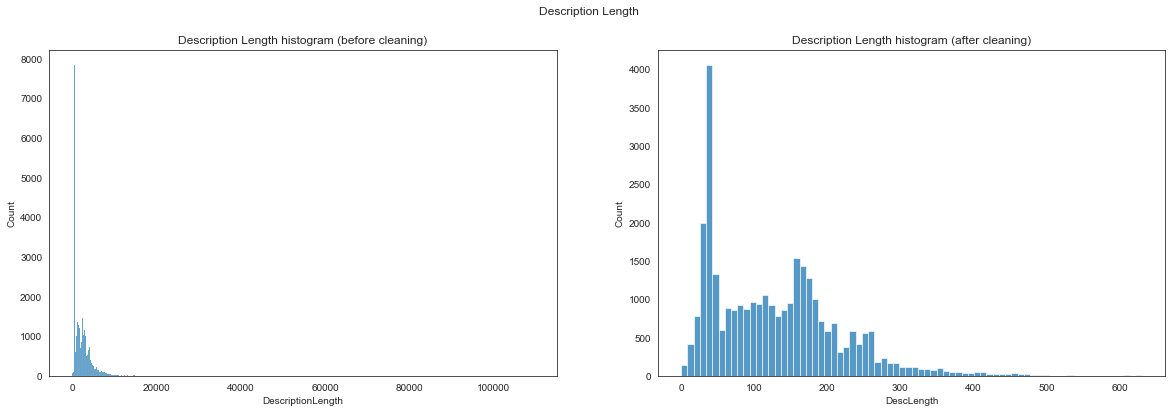

In [26]:
fig, axes = plt.subplots(1,2, figsize=(20,6))

# both subplots title
fig.suptitle('Description Length')

# plot1 object
sns.histplot(df['DescriptionLength'],ax=axes[0])
axes[0].set_title('Description Length histogram (before cleaning)')

# plot2 object
sns.histplot(df['DescLength'],ax=axes[1])
axes[1].set_title('Description Length histogram (after cleaning)')

# show plot
plt.show()

### Looks like we were able to clean a lot of unnecessary text

In [27]:
df.describe()

,DescLength,DescriptionLength
count,31426.000000,31426.000000
mean,129.052918,2481.080411
std,88.208415,2571.633684
min,0.000000,7.000000
25%,44.000000,512.000000
50%,119.000000,1983.000000
75%,180.000000,3269.000000
max,631.000000,109550.000000


#### We see that a minimum lenth of the Description is 0
Let's take a look on rows with small Description

In [53]:
df[df.DescLength <=0]

,ExtJobTitleText,JobTitle,Description,Desc,DescLength,DescriptionLength


There is no information in these rows.

In [51]:
df = df[df.DescLength > 0]

#### We saw there are rows with a '0000' job title, let's take a look at them

In [56]:
df[df.JobTitle == '0000'].head()

,ExtJobTitleText,JobTitle,Description,Desc,DescLength,DescriptionLength
13,Independent Operator,0000,"<div class=""earcu_posdescriptionContainer""><div class=""earcu_posdescription""><div class=""earcu_posdescriptionnote""><p><strong>DRIVE YOUR OWN BUSIN...","[avis, strong, rental, along, renowned, operation, one, must, internationallyrecognized, franchise, way, professional, travel, local, business, go...",136,2943
47,Behavioral Health Activity Therapist,0000,"<p style=""margin: 0in 0in 8pt;""><span style=""font-family: 'Verdana',sans-serif; font-size: 9pt;"">At Corizon Health, we share a common bond to deli...","[may, therapies, wellbeing, clinical, online, communities, psychology, life, assisting, common, juvenile, professional, planned, mental, extraordi...",155,3465
255,Family Medicine NP/PA - Locum Tenens - Southern California,0000,"<p><span style=""font-size:14px"">Locums FP NP/PA need at a clinic 2 hours East of San Diego for the dates of 12/23 - 1/3</span></p>\n\n<ul>\n\t<li...","[weekly, dates, enrolled, practice, deposit, staffing, panp, staff, hour, must, rated, nalto, nextgen, clinic, malpractice, alumni, travel, east, ...",42,1029
261,Physician Only - Maternal Fetal Medicine Locums Need with NYC Hospital - Part-Time - $2k Per Day,0000,<p><strong><u>Alumni Healthcare Staffing - </u></strong><strong><u>Maternal Fetal Medicine – NYC Locum Tenens:</u></strong></p>\n\n<ul>\n\t<li><st...,"[rate, ii, weekly, per, w, deposit, tenens, staffing, level, staff, daily, dopplers, ob, medicine, nalto, rated, imaging, malpractice, fetal, alum...",46,727
262,Full Time ER and Outpatient C/A Psychiatry Locums Need in Connecticut,0000,<p> </p>\n\n<ul>\n\t<li>Immediate start date</li>\n\t<li>Must be board certified</li>\n\t<li>M-F</li>\n\t<li>ER and Outpatient Child/Adol</li>\n\t...,"[month, ct, weekly, date, immediate, deposit, childadol, guaranteed, outpatient, license, must, rated, nalto, reliable, preferred, service, malpra...",36,532


#### We can not know, what the real job title is for these, so they are just as useless as NA, let's drop them.

In [59]:
df = df[df.JobTitle != '0000']

#### Let's take another look at the df metrics:

In [62]:
df.describe()

,DescLength,DescriptionLength
count,30673.000000,30673.000000
mean,129.074756,2482.968148
std,88.066583,2578.250691
min,1.000000,19.000000
25%,44.000000,512.000000
50%,119.000000,1986.000000
75%,180.000000,3270.000000
max,631.000000,109550.000000


## Lemmatization

#### We will use 'words' list for quick test as well as the first row of df

In [71]:
words = ['run', 'running', 'ran','go', 'going', 'goes', 'went']
test  = df.Desc[0]

* nltk library


In [75]:
from nltk.stem import WordNetLemmatizer
nltk_lemmatizer = WordNetLemmatizer()
words_nltk_lem = [nltk_lemmatizer.lemmatize(w) for w in words]
test_nltk_lem = [nltk_lemmatizer.lemmatize(w) for w in test]

* textblob library

In [83]:
from textblob import Word
words_textblob_lem = [Word(w).lemmatize() for w in words]
test_textblob_lem  = [Word(w).lemmatize() for w in test]

* spacy library

In [110]:
import spacy
nlp = spacy.load('en_core_web_sm')

words_spacy = " ".join([w for w in words])
doc_words = nlp(words_spacy)
tokens_words = []
for token in doc_words:
    tokens_words.append(token)
words_spacy_lem = [token.lemma_ for token in tokens_words]

test_spacy = " ".join([w for w in test])
doc_test = nlp(test_spacy)
tokens_test = []
for token in doc_test:
    tokens_test.append(token)
test_spacy_lem = [token.lemma_ for token in tokens_test]

## Stemming

#### We will do the stemming for our examples and than compare all the results

In [101]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemming = PorterStemmer()
words_stem = [stemming.stem(w) for w in words]
test_stem = [stemming.stem(w) for w in test]

# Comparing the results

* for 'words' list:

In [124]:
comparing_df_words = pd.DataFrame(words,columns=['original'])
comparing_df_words['nltk_lemmatization'] = words_nltk_lem
comparing_df_words['textblob_lemmatization'] = words_textblob_lem
comparing_df_words['spacy_lemmatization'] = words_spacy_lem
comparing_df_words['stemming'] = words_stem

In [127]:
comparing_df_words.T

,0,1,2,3,4,5,6
original,run,running,ran,go,going,goes,went
nltk_lemmatization,run,running,ran,go,going,go,went
textblob_lemmatization,run,running,ran,go,going,go,went
spacy_lemmatization,run,running,run,go,go,go,go
stemming,run,run,ran,go,go,goe,went


# for test:  --------   Yogev, I've got a problem here -----

In [121]:
test_spacy_lem[55:60],test[55:60]

(['customer', 'in', '’s', 'check', 'computer'],
 ['customers', 'in’s', 'check', 'computer', 'relationships'])

In [122]:
comparing_df = pd.DataFrame(test,columns=['original'])
comparing_df['nltk_lemmatization'] = test_nltk_lem
comparing_df['textblob_lemmatization'] = test_textblob_lem
comparing_df['spacy_lemmatization'] = test_spacy_lem
comparing_df['stemming'] = test_stem

In [108]:
comparing_df

,original,nltk_lemmatization,textblob_lemmatization
0,flexible,flexible,flexible
1,required,required,required
2,date,date,date
3,owned,owned,owned
4,strong,strong,strong
...,...,...,...
200,paid,paid,paid
201,contingent,contingent,contingent
202,lifeassist,lifeassist,lifeassist
203,individual,individual,individual
